# Optimization using Cplex


In [46]:
import pandas_datareader as web
import datetime

start = datetime.datetime(2016,10,1)
end = datetime.datetime(2017,10,1)


<br><br>
### read prepared data
 - cov_matrix: the covariance matrix of 49 prefered stocks

In [1]:
import cplex
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
cov_matrix = pd.read_csv('49StocksCovariance.csv')
sp_49 = pd.read_csv('SP500_preparation.csv')

### Build cplex model


In [9]:
def setproblemdata(p):
    # minimize risk while keeping the return constant
    p.objective.set_sense(p.objective.sense.minimize)  
    
    # add 49 variables: the weights for 49 stocks
    # upper boundaries are 1, lower boundaries are 0
    names = ['w'+str(i) for i in range(49)]
    p.variables.add(obj = [0]*49, ub = [1]*49, lb = [0]*49, names = names) 
                                
    
    my_senses = 'EG'
    my_rhs = [1,0.05]
    rows = [[names, [1]*49],                        # The sum of all weights is 1
           [names, list(sp_max50.Return[:49])]]     # The expected return is larger than 5%

    
    p.linear_constraints.add(lin_expr = rows, senses = my_senses, rhs = my_rhs)
  
    # add quadractic part in the objective (derivative of the formula related to risk)
    qmat = []
    for j in range(49):
        qmat.append([[i for i in range(49)], [2*matrix[j, m] for m in range(49)]]) 
    
    p.objective.set_quadratic(qmat)

p = cplex.Cplex()
setproblemdata(p)
p.solve()

### Optimized portfolio and each weight

In [10]:
p = cplex.Cplex()
setproblemdata(p)
p.solve()

Number of nonzeros in lower triangle of Q = 1176
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.03 ticks)
Summary statistics for factor of Q:
  Rows in Factor            = 49
  Integer space required    = 49
  Total non-zeros in factor = 1225
  Total FP ops to factor    = 40425
Tried aggregator 1 time.
QP Presolve added 0 rows and 49 columns.
Reduced QP has 51 rows, 98 columns, and 1372 nonzeros.
Reduced QP objective Q matrix has 49 nonzeros.
Presolve time = 0.05 sec. (0.18 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 1275
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.11 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 4
  Rows in Factor            = 51
  Integer space required    = 51
  Total non-zeros in factor = 1326
  Total FP ops to factor    = 45526
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  

<br><br>
 - test the sum of all weights

In [11]:
sum(p.solution.get_values())

0.9999999999999463

In [12]:
p.solution.get_values()

[0.024582620556469665,
 4.812612421453853e-08,
 2.7569978526801872e-08,
 0.024752259219524793,
 4.485332194035116e-08,
 9.70350214982366e-08,
 2.181870352475737e-08,
 2.1367517088073776e-08,
 2.6539194119491787e-07,
 2.599545830983521e-08,
 2.232323298491358e-08,
 0.2588878409594906,
 2.685741572393779e-08,
 4.7911090479260676e-05,
 1.0684021064853198e-07,
 3.838437485586177e-08,
 3.817820804928043e-08,
 3.44790104004553e-08,
 5.313067620298834e-08,
 0.09587485893223748,
 0.11832164102920396,
 2.313023273493387e-08,
 2.2498298387087244e-08,
 0.06144812858591556,
 3.446178245619279e-08,
 2.46272997729313e-08,
 3.7386797355548135e-08,
 7.309274716038933e-08,
 5.432271727045231e-08,
 1.6630535634294156e-08,
 0.17328147517510753,
 2.685320300270593e-08,
 2.3209461828547682e-08,
 0.0011621946687659958,
 1.1612580628734433e-07,
 0.14192554020677012,
 0.09971358367117467,
 3.022501000965409e-08,
 2.9736672660944624e-08,
 2.654022308345645e-08,
 4.843639872775243e-08,
 2.3164445211914866e-08,


### Result

 - each weight (round to 3 decimals)

In [25]:
portfolio_names = []
portfolio_weights = []
for i in range(49):
    #proportion = float('%.2f'%(p.solution.get_values()[i]))

    proportion = np.round(p.solution.get_values()[i], 3)  # keep results with 3 decimals and keep weights larger than 0 
    if proportion != 0:
        portfolio_names.append(StockNames[i])
        portfolio_weights.append(proportion)

df = pd.DataFrame(columns = portfolio_names)
df.loc['Weight'] = portfolio_weights
print('Selected stocks and their weights:')
print(df)
print('\nPortfolio risk:')
print(round(p.solution.get_objective_value(),7))

Selected stocks and their weights:
         ADBE   ALGN     BA    DXC    FMC   ISRG     MU   NVDA   PYPL  PGR
Weight  0.025  0.025  0.259  0.096  0.118  0.061  0.173  0.001  0.142  0.1

Portfolio risk:
0.0002582


In [14]:
print('Required Portfolio Return: 5%')
print('Required Stocks:', list(StockNames[stocks_votes['Vote result'].values > 1]),'(at least 10% for each) ')
print('Portfolio weights (round to three decimals): ')
print(df)
print('Portfolio risk: ', np.round(p.solution.get_objective_value(), 7))

Required Portfolio Return: 5%
Required Stocks: ['MAR', 'RTN', 'RSG', 'UNH'] (at least 10% for each) 
Portfolio weights (round to three decimals): 
         ADBE   ALGN     BA    DXC    FMC   ISRG     MU   NVDA   PYPL  PGR
Weight  0.025  0.025  0.259  0.096  0.118  0.061  0.173  0.001  0.142  0.1
Portfolio risk:  0.0002582


 - optimized risk

In [71]:
p.solution.get_objective_value()

0.0007338256438756863

<br><br>
### sensitivity analysis

In [5]:
def sensitivity(exp_return):
    p = cplex.Cplex()

    p.objective.set_sense(p.objective.sense.minimize)
    
    names = ['w'+str(i) for i in range(49)]
    p.variables.add(obj = [0]*49, ub = [1]*49, lb = [0]*49, names = names)
    
    my_senses = 'EG'
    my_rhs = [1,exp_return]
    rows = [[names, [1]*49],
           [names, list(sp_max50.Return[:49])]]

    
    p.linear_constraints.add(lin_expr = rows, senses = my_senses, rhs = my_rhs)
  
    qmat = []
    for j in range(49):
        qmat.append([[i for i in range(49)], [2*matrix[j, m] for m in range(49)]])
    
    p.objective.set_quadratic(qmat)
    p.solve()
            
    
    return (p.solution.get_objective_value(), np.array(p.solution.get_values()).round(3))


In [6]:
return_values = np.arange(0, 0.09, 0.001)
risks = []
for i in return_values:
    risks.append(sensitivity(i)[0])

Number of nonzeros in lower triangle of Q = 1176
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.03 ticks)
Summary statistics for factor of Q:
  Rows in Factor            = 49
  Integer space required    = 49
  Total non-zeros in factor = 1225
  Total FP ops to factor    = 40425
Tried aggregator 1 time.
QP Presolve eliminated 1 rows and 0 columns.
QP Presolve added 0 rows and 49 columns.
Reduced QP has 50 rows, 98 columns, and 1323 nonzeros.
Reduced QP objective Q matrix has 49 nonzeros.
Presolve time = 0.03 sec. (0.19 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 1225
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.10 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 4
  Rows in Factor            = 50
  Integer space required    = 50
  Total non-zeros in factor = 1275
  Total FP ops to factor    = 42925
 Itn      Pri

Tried aggregator 1 time.
QP Presolve added 0 rows and 49 columns.
Reduced QP has 51 rows, 98 columns, and 1372 nonzeros.
Reduced QP objective Q matrix has 49 nonzeros.
Presolve time = 0.03 sec. (0.18 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 1275
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.11 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 4
  Rows in Factor            = 51
  Integer space required    = 51
  Total non-zeros in factor = 1326
  Total FP ops to factor    = 45526
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf          
   0   5.4969009e-04  -4.9000001e+04  8.18e+02  9.31e+02  1.00e+03
   1   1.5345875e-02  -4.0723246e+04  1.62e+01  1.84e+01  1.98e+01
   2   3.3604479e-03  -1.0477699e+04  3.55e+00  4.04e+00  4.34e+00
   3   5.4961528e-04  -7.1606103e+02  1.06e-15  1.67e-15  9.05e-12
   4   5.4961158e-04  -3.5815956e+00

  Total non-zeros in factor = 1326
  Total FP ops to factor    = 45526
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf          
   0   3.9726635e-04  -4.9000000e+04  8.17e+02  9.31e+02  1.00e+03
   1   1.6000878e-02  -4.0669651e+04  1.65e+01  1.88e+01  2.02e+01
   2   3.6636092e-03  -1.0455288e+04  3.61e+00  4.11e+00  4.42e+00
   3   5.4426468e-04  -7.6262593e+02  1.01e-15  1.55e-15  7.60e-12
   4   5.4426114e-04  -3.8144497e+00  5.58e-16  9.99e-16  4.48e-12
   5   5.4232585e-04  -4.4782036e-02  8.14e-16  9.99e-16  3.02e-14
   6   4.8994999e-04  -1.7805322e-03  1.01e-15  1.89e-15  1.25e-15
   7   2.1202080e-04  -2.2345143e-04  3.21e-16  1.44e-15  1.22e-16
   8   1.4544884e-04   4.5562534e-05  1.21e-15  1.11e-15  2.60e-17
   9   1.2312665e-04   9.1157554e-05  9.83e-16  8.88e-16  8.09e-18
  10   1.1143520e-04   1.0697181e-04  5.69e-15  1.33e-15  1.87e-18
  11   1.0934161e-04   1.0922707e-04  1.67e-15  1.33e-15  1.78e-18
  12   1.0928232e-04   1.0928077e-04  4.51e-15  

   5   5.5406950e-04  -4.4321600e-02  3.10e-16  1.44e-15  2.75e-14
   6   4.9535540e-04  -1.8160240e-03  3.11e-16  8.88e-16  1.15e-15
   7   2.1229381e-04  -2.3194255e-04  7.09e-16  7.77e-16  1.13e-16
   8   1.4552754e-04   4.3150838e-05  1.06e-15  1.44e-15  2.45e-17
   9   1.2335537e-04   8.9983717e-05  6.69e-16  1.11e-15  8.36e-18
  10   1.1154022e-04   1.0671744e-04  1.26e-15  1.11e-15  1.89e-18
  11   1.0934660e-04   1.0922084e-04  3.45e-15  9.99e-16  1.83e-18
  12   1.0928239e-04   1.0928066e-04  5.32e-15  6.66e-16  2.30e-18
Barrier time = 0.10 sec. (1.32 ticks)

Total time on 4 threads = 0.10 sec. (1.32 ticks)
Number of nonzeros in lower triangle of Q = 1176
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.03 ticks)
Summary statistics for factor of Q:
  Rows in Factor            = 49
  Integer space required    = 49
  Total non-zeros in factor = 1225
  Total FP ops to factor    = 40425
Tried aggregator 1 time.
QP Presolve added 0 rows and


Total time on 4 threads = 0.10 sec. (1.32 ticks)
Number of nonzeros in lower triangle of Q = 1176
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.03 ticks)
Summary statistics for factor of Q:
  Rows in Factor            = 49
  Integer space required    = 49
  Total non-zeros in factor = 1225
  Total FP ops to factor    = 40425
Tried aggregator 1 time.
QP Presolve added 0 rows and 49 columns.
Reduced QP has 51 rows, 98 columns, and 1372 nonzeros.
Reduced QP objective Q matrix has 49 nonzeros.
Presolve time = 0.02 sec. (0.18 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 1275
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.11 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 4
  Rows in Factor            = 51
  Integer space required    = 51
  Total non-zeros in factor = 1326
  Total FP ops to factor    = 45526
 Itn    

  Total non-zeros in factor = 1225
  Total FP ops to factor    = 40425
Tried aggregator 1 time.
QP Presolve added 0 rows and 49 columns.
Reduced QP has 51 rows, 98 columns, and 1372 nonzeros.
Reduced QP objective Q matrix has 49 nonzeros.
Presolve time = 0.03 sec. (0.18 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 1275
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.11 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 4
  Rows in Factor            = 51
  Integer space required    = 51
  Total non-zeros in factor = 1326
  Total FP ops to factor    = 45526
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf          
   0   3.6590645e-04  -4.9000000e+04  8.17e+02  9.31e+02  1.00e+03
   1   1.7824746e-02  -4.0519831e+04  1.73e+01  1.97e+01  2.12e+01
   2   4.5844051e-03  -1.0165499e+04  3.70e+00  4.21e+00  4.52e+00
   3   6.6710495e-04  -8.1897573

  Total FP ops to factor    = 40425
Tried aggregator 1 time.
QP Presolve added 0 rows and 49 columns.
Reduced QP has 51 rows, 98 columns, and 1372 nonzeros.
Reduced QP objective Q matrix has 49 nonzeros.
Presolve time = 0.02 sec. (0.18 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 1275
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.11 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 4
  Rows in Factor            = 51
  Integer space required    = 51
  Total non-zeros in factor = 1326
  Total FP ops to factor    = 45526
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf          
   0   4.2048361e-04  -4.9000000e+04  8.17e+02  9.31e+02  1.00e+03
   1   1.8189833e-02  -4.0489784e+04  1.75e+01  1.99e+01  2.14e+01
   2   4.7814493e-03  -1.0063561e+04  3.69e+00  4.21e+00  4.52e+00
   3   7.5046099e-04  -8.0789366e+02  1.41e-15  1.33e-15  9.46e-12


Reduced QP has 51 rows, 98 columns, and 1372 nonzeros.
Reduced QP objective Q matrix has 49 nonzeros.
Presolve time = 0.03 sec. (0.18 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 1275
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.11 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 4
  Rows in Factor            = 51
  Integer space required    = 51
  Total non-zeros in factor = 1326
  Total FP ops to factor    = 45526
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf          
   0   4.9443693e-04  -4.9000000e+04  8.17e+02  9.31e+02  1.00e+03
   1   1.8560729e-02  -4.0459251e+04  1.76e+01  2.01e+01  2.16e+01
   2   4.9856766e-03  -9.9434807e+03  3.68e+00  4.19e+00  4.51e+00
   3   8.7826493e-04  -7.8588602e+02  8.25e-16  1.67e-15  1.12e-11
   4   8.7825135e-04  -3.9327689e+00  9.49e-16  1.33e-15  6.50e-12
   5   8.7362052e-04  -3.8860206e-0

Presolve time = 0.03 sec. (0.18 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 1275
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.11 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 4
  Rows in Factor            = 51
  Integer space required    = 51
  Total non-zeros in factor = 1326
  Total FP ops to factor    = 45526
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf          
   0   5.8776639e-04  -4.9000001e+04  8.17e+02  9.31e+02  1.00e+03
   1   1.8937497e-02  -4.0428229e+04  1.78e+01  2.03e+01  2.18e+01
   2   5.1971576e-03  -9.8035912e+03  3.66e+00  4.17e+00  4.48e+00
   3   1.0720303e-03  -7.5124280e+02  1.49e-15  1.67e-15  8.85e-12
   4   1.0720143e-03  -3.7602862e+00  4.65e-16  2.00e-15  6.93e-12
   5   1.0682868e-03  -4.0127729e-02  1.15e-15  1.33e-15  2.85e-14
   6   8.3622819e-04  -4.8846381e-03  6.56e-16  1.33e-15  3.72e-15
   

  Threads                   = 4
  Rows in Factor            = 51
  Integer space required    = 51
  Total non-zeros in factor = 1326
  Total FP ops to factor    = 45526
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf          
   0   7.0047202e-04  -4.9000001e+04  8.17e+02  9.31e+02  1.00e+03
   1   1.9320200e-02  -4.0396719e+04  1.79e+01  2.05e+01  2.20e+01
   2   5.4159403e-03  -9.6419996e+03  3.63e+00  4.14e+00  4.45e+00
   3   1.3620211e-03  -7.0250849e+02  6.70e-16  2.11e-15  1.13e-11
   4   1.3620039e-03  -3.5171420e+00  1.19e-15  7.77e-16  7.78e-12
   5   1.3601984e-03  -4.4485834e-02  1.52e-15  1.44e-15  3.89e-14
   6   1.1206414e-03  -5.7579370e-03  1.64e-15  1.11e-15  5.44e-15
   7   5.3563782e-04  -1.2233825e-03  1.01e-14  6.66e-16  1.22e-15
   8   3.9577306e-04  -1.8410825e-04  4.63e-14  2.22e-16  3.96e-16
   9   2.9663940e-04   1.4753102e-04  4.23e-14  1.11e-15  9.14e-17
  10   2.4475918e-04   2.2563972e-04  6.62e-14  1.11e-15  9.48e-18
  11   2.3836498e

  Rows in Factor            = 51
  Integer space required    = 51
  Total non-zeros in factor = 1326
  Total FP ops to factor    = 45526
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf          
   0   8.3255379e-04  -4.9000001e+04  8.17e+02  9.31e+02  1.00e+03
   1   1.9708901e-02  -4.0364719e+04  1.81e+01  2.06e+01  2.22e+01
   2   5.6337082e-03  -9.4678710e+03  3.59e+00  4.09e+00  4.40e+00
   3   1.7901680e-03  -6.3879395e+02  9.24e-16  1.33e-15  9.59e-12
   4   1.7901497e-03  -3.1994549e+00  3.32e-15  1.44e-15  7.94e-12
   5   1.7903759e-03  -4.2780281e-02  3.38e-15  8.88e-16  4.18e-14
   6   1.5148522e-03  -6.5863401e-03  2.57e-15  1.11e-15  7.14e-15
   7   8.6746247e-04  -2.1960587e-03  7.95e-15  1.44e-15  2.62e-15
   8   5.0185435e-04   6.8701855e-05  1.25e-14  1.55e-15  2.72e-16
   9   3.6699418e-04   2.7709754e-04  2.54e-14  1.67e-15  3.38e-17
  10   3.4340415e-04   3.2905341e-04  5.21e-14  8.88e-16  9.52e-18
  11   3.3593398e-04   3.3540891e-04  8.35e-14  8

   0   9.8401172e-04  -4.9000001e+04  8.17e+02  9.31e+02  1.00e+03
   1   2.0103665e-02  -4.0332227e+04  1.83e+01  2.08e+01  2.24e+01
   2   5.8516625e-03  -9.2755987e+03  3.53e+00  4.03e+00  4.33e+00
   3   2.4516337e-03  -7.0231506e+02  5.77e-02  6.58e-02  7.07e-02
   4   2.4995720e-03  -4.5784777e+00  2.84e-04  3.24e-04  3.48e-04
   5   2.5014960e-03  -5.3812381e-02  6.30e-07  7.18e-07  7.71e-07
   6   2.1869761e-03  -8.1488259e-03  1.10e-07  1.25e-07  1.35e-07
   7   1.2320836e-03  -2.1370369e-03  3.38e-08  3.85e-08  4.14e-08
   8   6.4648198e-04   3.2498137e-04  5.30e-10  6.04e-10  6.49e-10
   9   5.7791211e-04   4.4776082e-04  2.20e-10  2.51e-10  2.70e-10
  10   4.9997519e-04   4.9289283e-04  1.11e-12  1.21e-12  1.30e-12
  11   4.9563422e-04   4.9553448e-04  2.40e-13  2.78e-15  3.78e-15
  12   4.9558568e-04   4.9558442e-04  7.94e-14  1.33e-15  2.44e-17
Barrier time = 0.11 sec. (1.32 ticks)

Total time on 4 threads = 0.12 sec. (1.32 ticks)
Number of nonzeros in lower triangle of Q

   9   1.2335449e-03   1.2307017e-03  2.83e-13  8.88e-16  7.91e-17
  10   1.2313417e-03   1.2313043e-03  4.91e-13  1.11e-15  5.30e-17
  11   1.2313220e-03   1.2313216e-03  5.89e-14  1.22e-15  5.90e-17
Barrier time = 0.10 sec. (1.25 ticks)

Total time on 4 threads = 0.11 sec. (1.25 ticks)
Number of nonzeros in lower triangle of Q = 1176
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.03 ticks)
Summary statistics for factor of Q:
  Rows in Factor            = 49
  Integer space required    = 49
  Total non-zeros in factor = 1225
  Total FP ops to factor    = 40425
Tried aggregator 1 time.
QP Presolve added 0 rows and 49 columns.
Reduced QP has 51 rows, 98 columns, and 1372 nonzeros.
Reduced QP objective Q matrix has 49 nonzeros.
Presolve time = 0.03 sec. (0.18 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 1275
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0

  Total FP ops to factor    = 40425
Tried aggregator 1 time.
QP Presolve added 0 rows and 49 columns.
Reduced QP has 51 rows, 98 columns, and 1372 nonzeros.
Reduced QP objective Q matrix has 49 nonzeros.
Presolve time = 0.03 sec. (0.18 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 1275
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.11 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 4
  Rows in Factor            = 51
  Integer space required    = 51
  Total non-zeros in factor = 1326
  Total FP ops to factor    = 45526
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf          
   0   1.6100665e-03  -4.9000002e+04  7.96e+01  4.90e+01  1.00e+03
   1   3.8770430e-03  -3.7186623e+03  4.58e+00  2.82e+00  5.75e+01
   2   4.6797767e-03  -1.1865090e+03  1.16e+00  7.13e-01  1.46e+01
   3   6.6259897e-03  -1.6829758e+02  3.99e-15  1.72e-15  9.84e-12


  Integer space required    = 51
  Total non-zeros in factor = 1326
  Total FP ops to factor    = 45526
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf          
   0   1.8438731e-03  -4.9000002e+04  7.95e+01  4.90e+01  1.00e+03
   1   4.2315152e-03  -3.8751639e+03  4.89e+00  3.01e+00  6.15e+01
   2   5.8238483e-03  -1.3319888e+03  1.41e+00  8.72e-01  1.78e+01
   3   8.3975626e-03  -1.8720136e+02  6.13e-15  1.67e-15  1.10e-11
   4   8.3974396e-03  -9.3644961e-01  2.35e-14  1.55e-15  6.90e-12
   5   8.3762180e-03  -9.0896451e-03  1.06e-14  1.50e-15  6.59e-14
   6   7.0290855e-03  -8.8773502e-04  1.65e-14  9.99e-16  2.89e-14
   7   4.7927579e-03   2.8242493e-03  1.28e-13  1.11e-15  6.20e-15
   8   4.0098423e-03   3.5741102e-03  9.90e-14  9.99e-16  1.28e-15
   9   3.7525095e-03   3.7406123e-03  9.90e-14  1.89e-15  1.35e-16
  10   3.7447611e-03   3.7446138e-03  1.22e-13  1.67e-15  1.55e-16
  11   3.7446895e-03   3.7446880e-03  6.50e-14  1.33e-15  1.41e-16
Barrier time = 

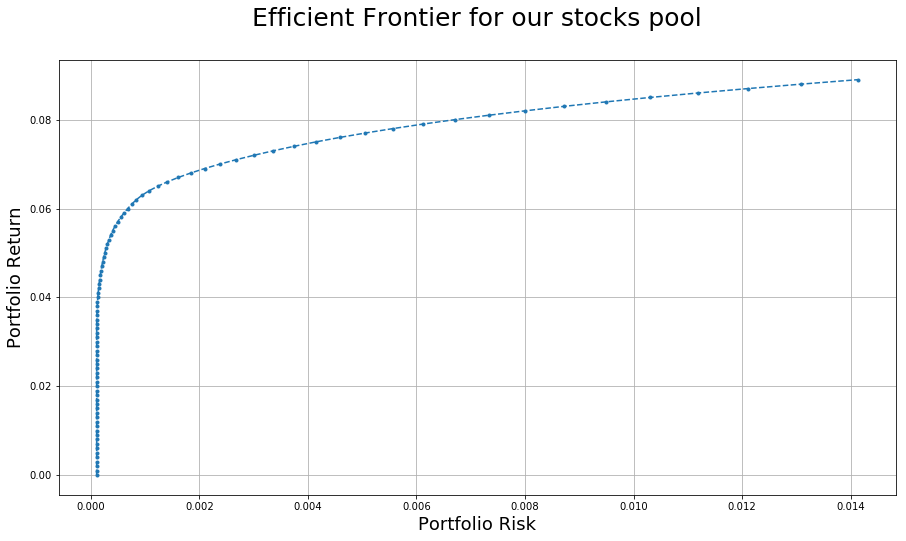

In [10]:
plt.figure(figsize=(15,8))
plt.plot(risks, return_values, '.--')
plt.xlabel('Portfolio Risk', fontsize = 18)
plt.ylabel('Portfolio Return', fontsize = 18)
plt.title('Efficient Frontier for our stocks pool\n', fontsize = 25)
#plt.legend('Portfolio risk increases slowly until Portfolio return reaches about 0.05', loc = 7, prop={'size': 6})
plt.grid()
plt.show()

 - check the abnormal part of the curve

In [40]:
np.sum(sensitivity(0.07)[1])

Number of nonzeros in lower triangle of Q = 1176
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.03 ticks)
Summary statistics for factor of Q:
  Rows in Factor            = 49
  Integer space required    = 49
  Total non-zeros in factor = 1225
  Total FP ops to factor    = 40425
Tried aggregator 1 time.
QP Presolve added 0 rows and 49 columns.
Reduced QP has 51 rows, 98 columns, and 1372 nonzeros.
Reduced QP objective Q matrix has 49 nonzeros.
Presolve time = 0.03 sec. (0.18 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 1275
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.11 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 4
  Rows in Factor            = 51
  Integer space required    = 51
  Total non-zeros in factor = 1326
  Total FP ops to factor    = 45526
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  

1.032